In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
path = '/content/gdrive/MyDrive/ColabNotebooks/imagedb_btsd.zip'

In [3]:
import os
import zipfile
local_zip = 'imagedb_btsd.zip'
zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
train_dir = 'imagedb'
validation_dir = 'imagedb_test'

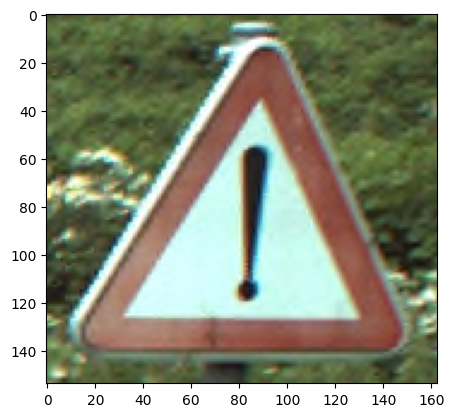

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = "/content/imagedb/00013/00138_00000.ppm"
img = mpimg.imread(img_path)
plt.imshow(img, cmap='gray')

plt.show()

In [6]:
# Χρήση ΜΗ προ-εκπαιδευμένου δικτύου

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator()
test_datagen  = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(28, 28),
    batch_size=20,
    class_mode='categorical',
    color_mode='rgb'
    #color_mode='grayscale'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(28, 28),       # Μέγεθος εικόνας
    batch_size=20,
    class_mode='categorical',
    color_mode='rgb'
    #color_mode='grayscale'
)

Found 3056 images belonging to 34 classes.
Found 2149 images belonging to 34 classes.


In [7]:
# Χρήση ΜΗ προ-εκπαιδευμένου δικτύου

import tensorflow as tf


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 3)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(34, activation='softmax') # Αριθμός κατηγοριών
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 16)          │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         230,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 34)                  │           3,434 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,150 (918.55 KB)

 Trainable params: 235,150 (918.55 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Χρήση ΜΗ προ-εκπαιδευμένου δικτύου

# Δημιουργία Data Augmentation με random crop, zoom και ασπρόμαυρες εικόνες
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,    # Κανονικοποίηση
    zoom_range=0.2,         # Εφαρμογή zoom
    shear_range=0.2,        # Random shear transformations
    horizontal_flip=True,   # Οριζόντια αναστροφή
    height_shift_range=0.2, # Μετατόπιση ύψους
    width_shift_range=0.2,  # Μετατόπιση πλάτους
    preprocessing_function=lambda img: tf.image.resize(
        tf.image.random_crop(img, size=(24, 24, 3)), (28, 28)
    )
)

# Δημιουργία Data Augmentation για ασπρόμαυρες εικόνες
bw_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    zoom_range=0.2,
    preprocessing_function=lambda img: tf.image.rgb_to_grayscale(img)
)

# Εφαρμογή του Data Augmentation στους φακέλους των δεδομένων
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical'
)

bw_generator = bw_datagen.flow_from_directory(
    validation_dir,
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical'
)

# Validation data generator
validation_generator = ImageDataGenerator(rescale=1.0 / 255.0).flow_from_directory(
    validation_dir,
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical'
)


Found 3056 images belonging to 34 classes.
Found 2149 images belonging to 34 classes.
Found 2149 images belonging to 34 classes.


In [6]:
# Χρήση προ-εκπαιδευμένου δικτύου: ResNet50

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

train_datagen = ImageDataGenerator()
test_datagen  = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=60,
    class_mode='categorical',
    color_mode='rgb'
    #color_mode='grayscale'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=60,
    class_mode='categorical',
    color_mode='rgb'
    #color_mode='grayscale'
)

Found 3056 images belonging to 34 classes.
Found 2149 images belonging to 34 classes.


In [7]:
# Χρήση προ-εκπαιδευμένου δικτύου: ResNet50

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Φόρτωση του ResNet50 με προ-εκπαιδευμένα βάρη από το ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Πάγωμα των προκαθορισμένων βαρών
for layer in base_model.layers:
    layer.trainable = False

# Προσαρμογή του δικτύου για το dataset
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.6),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(34, activation='softmax')  # 34 κατηγορίες
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 34)                  │           4,386 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,706,850 (94.25 MB)

 Trainable params: 1,119,138 (4.27 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [8]:
# Χρήση προ-εκπαιδευμένου δικτύου: ResNet50

# Δημιουργία Data Augmentation με random crop, zoom και ασπρόμαυρες εικόνες
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,    # Κανονικοποίηση
    zoom_range=0.2,         # Εφαρμογή zoom
    shear_range=0.2,        # Random shear transformations
    horizontal_flip=True,   # Οριζόντια αναστροφή
    height_shift_range=0.2, # Μετατόπιση ύψους
    width_shift_range=0.2,  # Μετατόπιση πλάτους
    preprocessing_function=lambda img: tf.image.resize(
        tf.image.random_crop(img, size=(224, 224, 3)), (224, 224)
    )
)

# Δημιουργία Data Augmentation για ασπρόμαυρες εικόνες
bw_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    zoom_range=0.2,
    preprocessing_function=lambda img: tf.image.rgb_to_grayscale(img)
)

# Εφαρμογή του Data Augmentation στους φακέλους των δεδομένων
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

bw_generator = bw_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Validation data generator
validation_generator = ImageDataGenerator(rescale=1.0 / 255.0).flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 3056 images belonging to 34 classes.
Found 2149 images belonging to 34 classes.
Found 2149 images belonging to 34 classes.


In [9]:


callbacks = []

# Αποθήκευση των καλύτερων βαρών με σωστή κατάληξη
save_best_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_weights.keras',
    save_best_only=True,
    verbose=1
)
callbacks.append(save_best_callback)

# Πρόωρη διακοπή
early_stop_callback = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True, verbose=1
)
callbacks.append(early_stop_callback)

# Εκπαίδευση του μοντέλου
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=50,
    epochs=40,
    validation_steps=35,
    verbose=1,
    callbacks=callbacks
)


Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.1453 - loss: 3.2677
Epoch 1: val_loss improved from inf to 2.62889, saving model to best_weights.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 214ms/step - accuracy: 0.1460 - loss: 3.2643 - val_accuracy: 0.3339 - val_loss: 2.6289
Epoch 2/40
39/50 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.2249 - loss: 2.6627

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss improved from 2.62889 to 2.31185, saving model to best_weights.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.2291 - loss: 2.6548 - val_accuracy: 0.3780 - val_loss: 2.3119
Epoch 3/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.2915 - loss: 2.4484
Epoch 3: val_loss improved from 2.31185 to 2.08759, saving model to best_weights.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.2916 - loss: 2.4469 - val_accuracy: 0.3839 - val_loss: 2.0876
Epoch 4/40
39/50 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.3214 - loss: 2.3230
Epoch 4: val_loss improved from 2.08759 to 2.00432, saving model to best_weights.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.3249 - loss: 2.3099 - val_accuracy: 0.4441 - val_loss: 2.0043
Epoch 5/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.3423 - loss: 2.1740
Epoch 5: val_loss improved from 2.00432 to 1.80703, saving model to best_weights.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 143ms/step -

In [10]:
test_datagen  = ImageDataGenerator()
test_dir = os.path.join(train_dir, 'test')
# Ορισμός της διαδρομής του φακέλου δοκιμής
test_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(28, 28),
    batch_size=10,
    class_mode='categorical',
    color_mode='rgb'
)

# Αξιολόγηση του μοντέλου
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc}")

Found 2149 images belonging to 34 classes.
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.6647 - loss: 113.7058
Test Accuracy: 0.6728711128234863


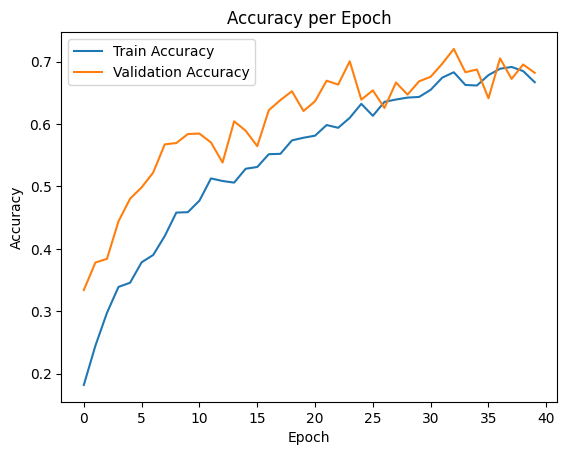

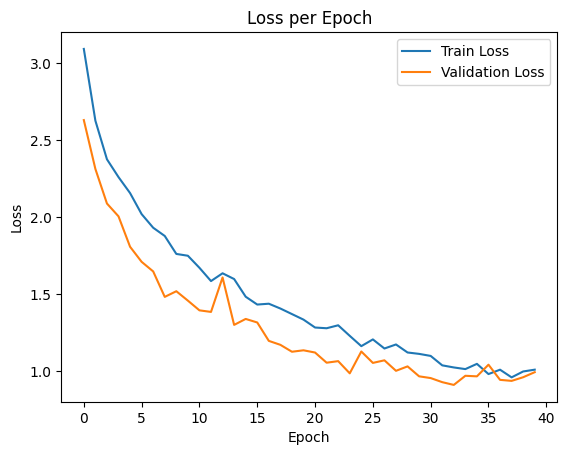

In [11]:
# Γράφημα ακρίβειας
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Γράφημα απώλειας
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
